In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pytesseract
import re

In [2]:
image_file = "biscuit.jpg"
img = cv2.imread(image_file)

In [3]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    
    if len(im_data.shape) == 2: 
        height, width = im_data.shape
        figsize = width / float(dpi), height / float(dpi)
        fig = plt.figure(figsize=figsize)
        ax = fig.add_axes([0, 0, 1, 1])
        ax.axis('off')
        ax.imshow(im_data, cmap='gray')
    else:  
        height, width, depth = im_data.shape
        figsize = width / float(dpi), height / float(dpi)
        fig = plt.figure(figsize=figsize)
        ax = fig.add_axes([0, 0, 1, 1])
        ax.axis('off')
        ax.imshow(im_data)

    plt.show()

display(image_file)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\PC\\Desktop\\OCR\\biscuit.jpg'

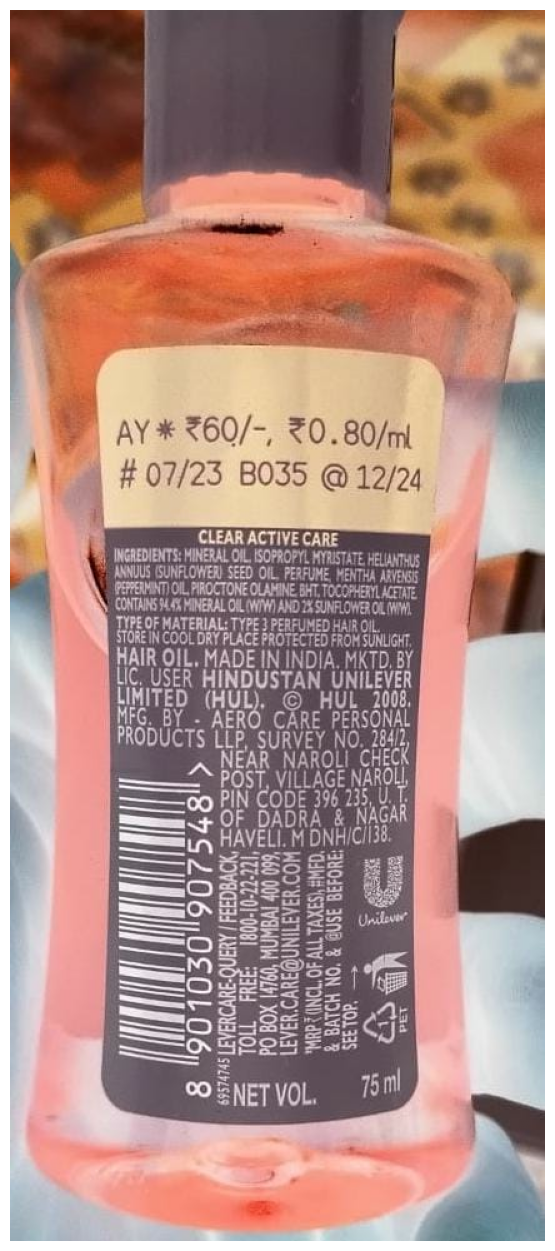

In [7]:
# to invert the image 
inverted_image = cv2.bitwise_not(img)
cv2.imwrite("inverted.png", inverted_image)
display("inverted.png")

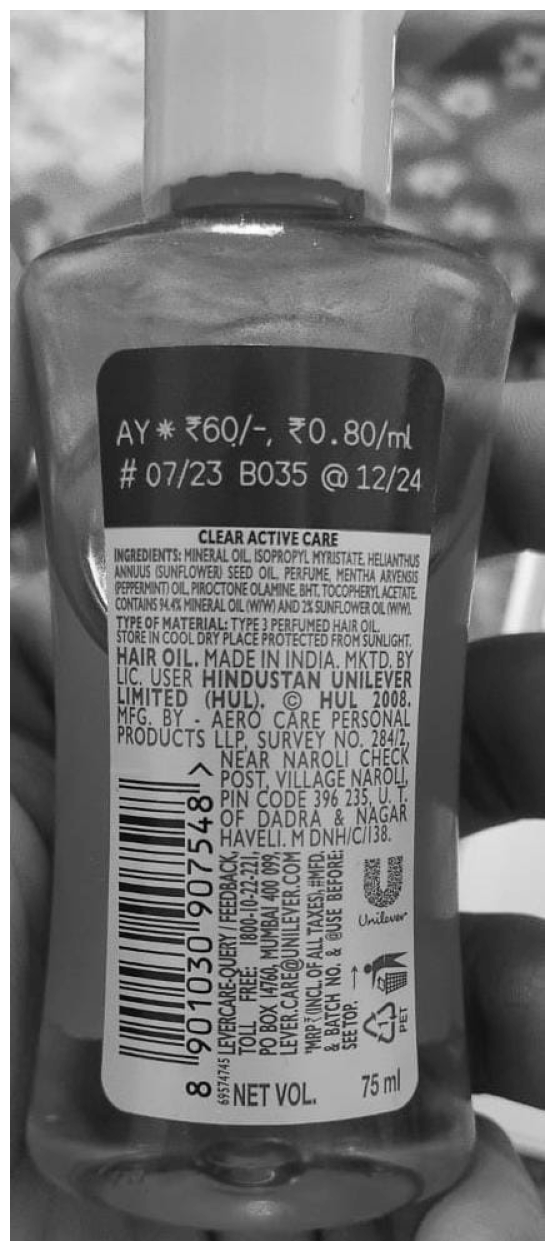

True

In [8]:
#Binarization
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray_image = grayscale(img)
cv2.imwrite("gray.png", gray_image)
display("gray.png")

thresh , im_bw = cv2.threshold(gray_image, 130, 255, cv2.THRESH_BINARY)
cv2.imwrite("im_bw.png" , im_bw)

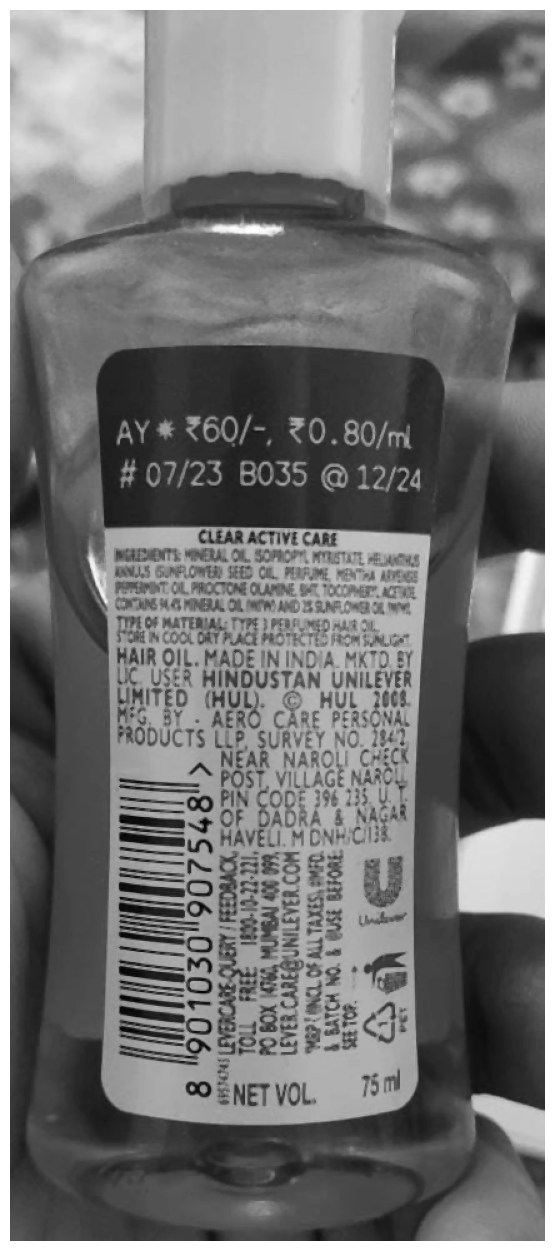

In [9]:
#Noise Removal
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1,1), np.uint8)
    image = cv2.dilate(image,kernel,iterations=1)
    kernel = np.ones((1,1),np.uint8)
    image = cv2.erode(image , kernel, iterations=1)
    image = cv2.morphologyEx(image , cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image , 3)
    return(image)

no_noise = noise_removal(gray_image)
cv2.imwrite("noise.png" , no_noise)
display("noise.png")

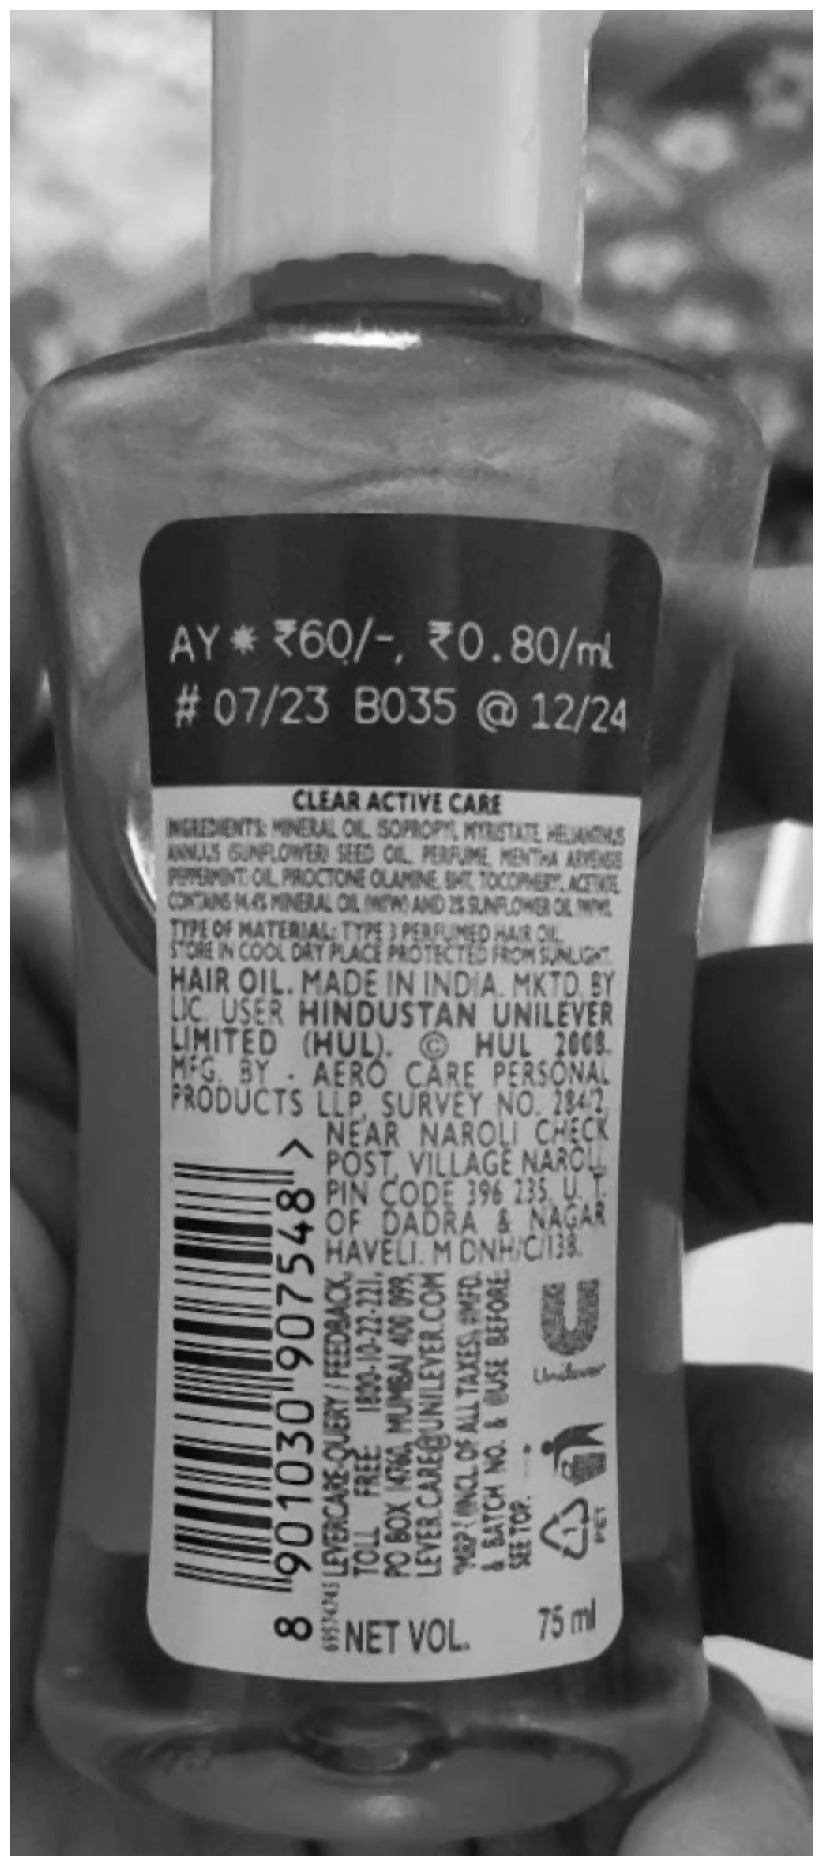

In [10]:
def resize_image(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    resized_image = cv2.resize(image, (width, height), interpolation = cv2.INTER_AREA)
    return resized_image

resized_image = resize_image(no_noise, 150)
cv2.imwrite("resized.png", resized_image)
display("resized.png")


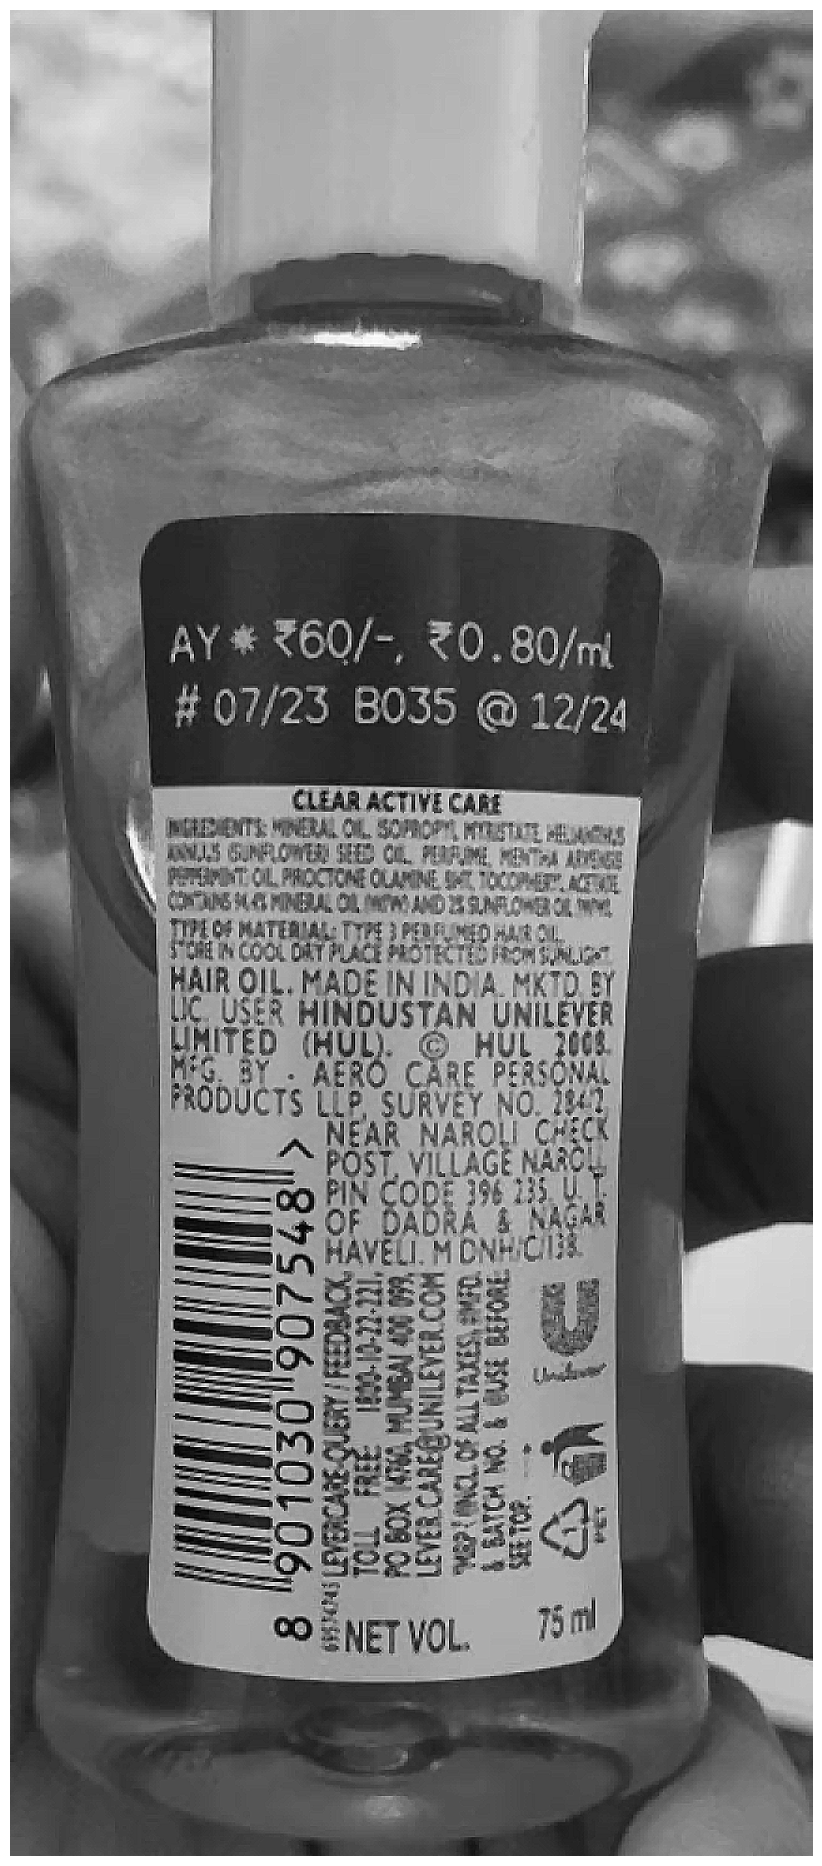

In [11]:
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]]) 
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened

sharpened_image = sharpen_image(resized_image)
cv2.imwrite("sharpened.png", sharpened_image)
display("sharpened.png")


In [12]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

ocr_text = pytesseract.image_to_string(image_file) 

print("Extracted Text:\n", ocr_text)


Extracted Text:
 AY * 60/-, %0.80/m
# 07/23 BO35 @ 12/24

PROCTONE LAM
i ANERAL OL WT)
TYPEOF MATERIAL: TYPE 3 F
STOREIN COOL DRY PLACE PRO’
HAIR OIL, MADE IN INDIA. MKTD, BY
UC USER Hil
T! ©
RE

cz
sie]

os

Bae
Sa=
Oxo!

DU

Ee
is

73:
Om
cA

Es

mz
oat

eS
132
Za 2
S25
234
Sz
i

is
2
S.
3

PO BOX 147

By




In [13]:
import re
from datetime import datetime

# Updated patterns for date and MRP
date_pattern = r'\b(?:[@#]?\s*(\d{2}[/-]\d{2}[/-]\d{2,4}|\d{1,2} [a-zA-Z]{3,9} \d{4}|\d{1,2} [a-zA-Z]{3,9},? \d{4}))\b'
mrp_pattern = r'(?i)\b(?:₹|Rs\.?|INR|MRP)?\s*(\d{1,3}(?:\.\d{1,2})?)\b'

def process_ocr_text(text):
    # Extracting all dates from the text using the pattern
    date_matches = re.findall(date_pattern, text)
    date_objs = []
    
    if date_matches:
        for date in date_matches:
            try:
                # Check if the date is in the format 'YY-MM-DD'
                date_obj = datetime.strptime(date, '%y-%m-%d')
                date_objs.append(date_obj)
            except ValueError:
                try:
                    # Handling date formats like '25-Jul-2023'
                    date_obj = datetime.strptime(date, '%d-%b-%Y')
                    date_objs.append(date_obj)
                except ValueError:
                    continue

    # Extract the latest expiration date
    if date_objs:
        expiration_date = sorted(date_objs)[-1].strftime('%m/%y')
    else:
        expiration_date = 'Not found'

    # Extract MRP
    mrp_matches = re.findall(mrp_pattern, text)
    if mrp_matches:
        mrp = max([float(mrp) for mrp in mrp_matches])  # Take the largest value assuming it's the correct MRP
    else:
        mrp = 'Not found'

    expiration_date = sorted(date_objs)[-1].strftime('%m/%Y') if date_objs else 'Not found'

    return expiration_date, mrp


# Simulating extracted OCR text
ocr_text1 = ocr_text  # Replace this with your OCR extraction logic

# Process the extracted OCR text for Expiry Date and MRP
expiration, mrp = process_ocr_text(ocr_text1)

print(f"Expiration Date: {expiration}")
print(f"MRP: {mrp}")


Expiration Date: Not found
MRP: 234.0
